In [ ]:
# In this script I want to see the patterns of Kd1 vs Kd2 in real PDB structures. 
# I had previously looked at all the PDB structures and recorded BSASA for those which had a stacked trimer structure
# Name: Leo Lagunes and Paige M.
# Date: 02/07/23 

# Last update: 02/07/23

# IMPORTANT NOTE: It is possible that since the structures were identified as stacked trimers by hand, there could be some 
# errors - subjective method. 

In [18]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime
from matplotlib.ticker import LogLocator
import matplotlib
import pandas as pd
import csv

print('All packages loaded!')

All packages loaded!


In [2]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell



# --- Today --- 
now = datetime.now(); dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
today_pre = date.today()
today = today_pre.strftime("%m_%d_%y")
print("Functions ready...", dt_string)


Functions ready... 02/17/2023 11:43:25


Found  1580  stacked trimers in total (~44%)


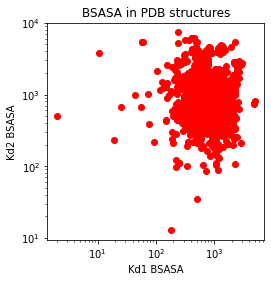

In [65]:
# ---------------------------------------------------------
# --- EXTRACT STACKED TRIMERS FROM FILLED OUT DATASET ---
# ---------------------------------------------------------

# --- Load dataset (.csv) ---
filename = 'BSASA_workthrough_data.csv'

stacked_trimers_all = [] # list containing all the PDB codes, Kd1 and Kd2 for the stacked rings 
with open(filename, 'r') as csvfile:
    datareader = csv.reader(csvfile)
    # --- extract only the stacked trimers --- 
    for row in datareader: # for each line, check if KD1 and KD2 have numeric entries (those are the stacked rings)
        if row[1] != 'na' and row[1] != 'na ': # 'na' was the notation I used for a not-applicable structure that is not a stacked ring
            # save the PDB code, Kd1 and Kd2 values
            if row[0] != 'PDB': # remove header
                #print(row)
                addItem = [row[0],float(row[1]),float(row[2])]
                stacked_trimers_all.append(addItem)
            #print(addItem)
            
# How many stacked trimers did I get?
print("Found ", len(stacked_trimers_all), ' stacked trimers in total (~44%)')
# --- prep list for plotting --- 
KD1s = []; KD2s = []; # lists to hold KD1 and KD2
for listI in stacked_trimers_all:
    KD1_item = listI[1]; KD2_item = listI[2];
    KD1s.append(KD1_item); KD2s.append(KD2_item);
       
# --- plot KD1 vs KD2 --- 
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(KD1s,KD2s,'ro')
plt.xscale('log')
plt.yscale('log')

plt.title("BSASA in PDB structures"); plt.xlabel('Kd1 BSASA'); plt.ylabel('Kd2 BSASA')

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('BSASA'+today+'.eps')
